### Loading required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pysustrans.association import Association
from pysustrans.correlation import Correlation

### Check the version

In [2]:
import pysustrans
print(pysustrans.__version__)

0.0.111


### Loading tips dataset from seaborn library

In [3]:
# Loading tips dataset
tips = sns.load_dataset("tips")

# Print first five observations
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Converting categorical variables to object type

In [4]:
df = tips.apply(
        lambda x: x.astype("object") if x.dtype == "category" else x)

### Estimating pair-wise association and generating plot 

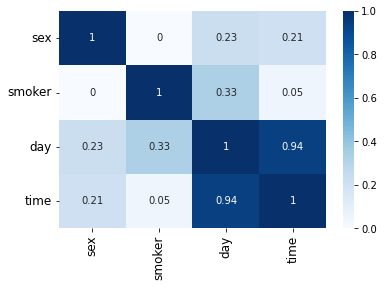

In [5]:
aos = Association(df, method = "cramer")
res = aos.fit()
ax = res["ax"]
fig = plt.gcf()

### Changing figure size

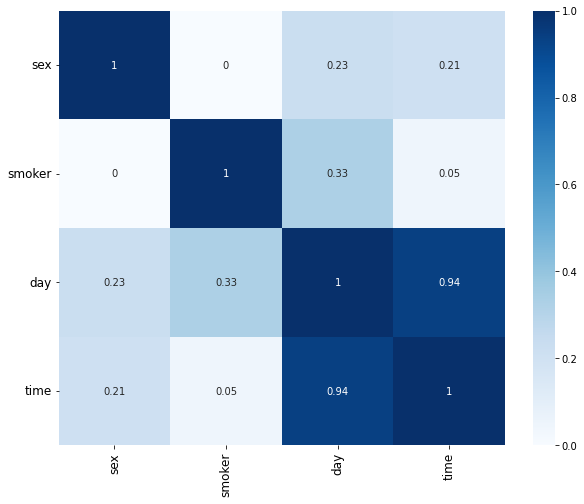

In [6]:
ax.figure.set_size_inches((10, 8))
fig

### Generating same plot using matplotlib and DataFrame stored in "res"

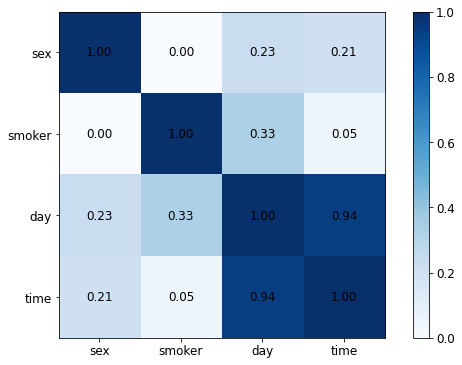

In [7]:
cfit = res["asso"]

# Instantiating a figure and axes object
fig, ax = plt.subplots(figsize = (10, 6))
# Generate a plot
cax = ax.imshow(cfit.values, interpolation='nearest', cmap='Blues', vmin=0, vmax=1)
# Setting the axes labels
ax.set_xticks(ticks = range(len(cfit.columns)),
              labels = cfit.columns)
ax.set_yticks(ticks = range(len(cfit.columns)),
              labels = cfit.columns)
# Setting tick parameters
ax.tick_params(axis = "x", labelsize = 12, labelrotation = 0)
ax.tick_params(axis = "y", labelsize = 12, labelrotation = 0)
# Adding a colorbar
fig.colorbar(cax).ax.tick_params(labelsize = 12)
# Adding annotations
for (x, y), t in np.ndenumerate(cfit):
    ax.annotate("{:.2f}".format(t),
                xy = (x, y),
                va = "center",
                ha = "center").set(color = "black", size = 12)

### Estimating pair-wise correlation and generating plot 

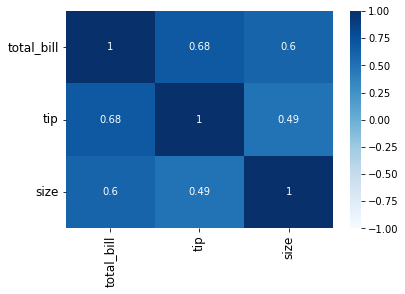

In [8]:
aos = Correlation(tips, method = "pearson")
res = aos.fit()
ax = res["ax"]
fig = plt.gcf()

In [9]:
res

{'corr_mat':             total_bill   tip  size
 total_bill        1.00  0.68  0.60
 tip               0.68  1.00  0.49
 size              0.60  0.49  1.00,
 'corr_df':         Variable-Pair  Correlation (r)  p-val
 0   (total_bill, tip)            0.676    0.0
 1  (total_bill, size)            0.598    0.0
 2         (tip, size)            0.489    0.0,
 'ax': <AxesSubplot:>}

In [10]:
res["corr_df"]

,Variable-Pair,Correlation (r),p-val
0,"(total_bill, tip)",0.676,0.0
1,"(total_bill, size)",0.598,0.0
2,"(tip, size)",0.489,0.0


### Changing figure size

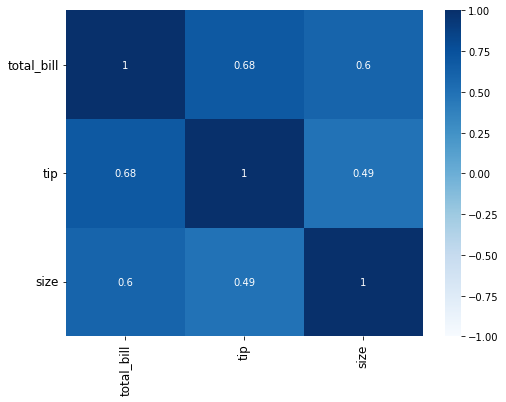

In [11]:
ax.figure.set_size_inches((8, 6))
fig

### Generating same plot using matplotlib and DataFrame stored in "res"

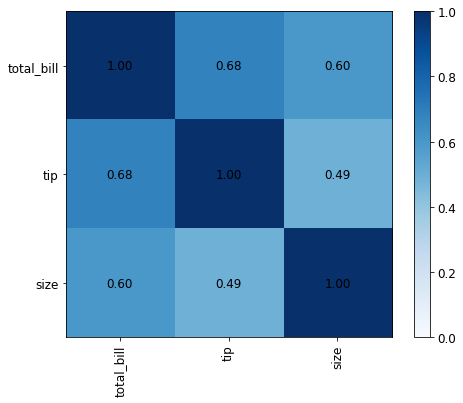

In [12]:
cfit = res["corr_mat"]

# Instantiating a figure and axes object
fig, ax = plt.subplots(figsize = (8, 6))
# Generate a plot
cax = ax.imshow(cfit.values, interpolation='nearest', cmap='Blues', vmin=0, vmax=1)
# Setting the axes labels
ax.set_xticks(ticks = range(len(cfit.columns)),
              labels = cfit.columns)
ax.set_yticks(ticks = range(len(cfit.columns)),
              labels = cfit.columns)
# Setting tick parameters
ax.tick_params(axis = "x", labelsize = 12, labelrotation = 90)
ax.tick_params(axis = "y", labelsize = 12, labelrotation = 0)
# Adding a colorbar
fig.colorbar(cax).ax.tick_params(labelsize = 12)
# Adding annotations
for (x, y), t in np.ndenumerate(cfit):
    ax.annotate("{:.2f}".format(t),
                xy = (x, y),
                va = "center",
                ha = "center").set(color = "black", size = 12)

### Testing concrete dataset

In [13]:
concrete = pd.read_csv("concrete.csv")
concrete.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


### Estimating pair-wise correlation and generating plot 

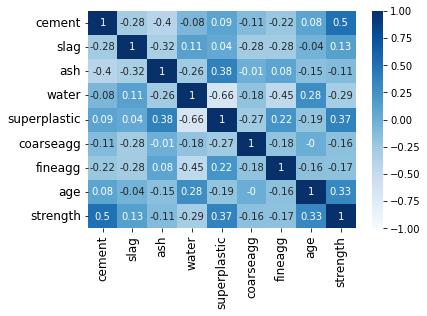

In [14]:
aos = Correlation(concrete, method = "pearson")
res = aos.fit()
ax = res["ax"]
fig = plt.gcf()

In [15]:
res

{'corr_mat':               cement  slag   ash  water  superplastic  coarseagg  fineagg  \
 cement          1.00 -0.28 -0.40  -0.08          0.09      -0.11    -0.22   
 slag           -0.28  1.00 -0.32   0.11          0.04      -0.28    -0.28   
 ash            -0.40 -0.32  1.00  -0.26          0.38      -0.01     0.08   
 water          -0.08  0.11 -0.26   1.00         -0.66      -0.18    -0.45   
 superplastic    0.09  0.04  0.38  -0.66          1.00      -0.27     0.22   
 coarseagg      -0.11 -0.28 -0.01  -0.18         -0.27       1.00    -0.18   
 fineagg        -0.22 -0.28  0.08  -0.45          0.22      -0.18     1.00   
 age             0.08 -0.04 -0.15   0.28         -0.19      -0.00    -0.16   
 strength        0.50  0.13 -0.11  -0.29          0.37      -0.16    -0.17   
 
                age  strength  
 cement        0.08      0.50  
 slag         -0.04      0.13  
 ash          -0.15     -0.11  
 water         0.28     -0.29  
 superplastic -0.19      0.37  
 coarseagg    

In [16]:
res["corr_df"][0:10]

,Variable-Pair,Correlation (r),p-val
0,"(cement, slag)",-0.275,0.000
1,"(cement, ash)",-0.397,0.000
2,"(cement, water)",-0.082,0.009
3,"(cement, superplastic)",0.092,0.003
4,"(cement, coarseagg)",-0.109,0.000
5,"(cement, fineagg)",-0.223,0.000
6,"(cement, age)",0.082,0.009
7,"(cement, strength)",0.498,0.000
8,"(slag, ash)",-0.324,0.000
9,"(slag, water)",0.107,0.001


### Change figure size

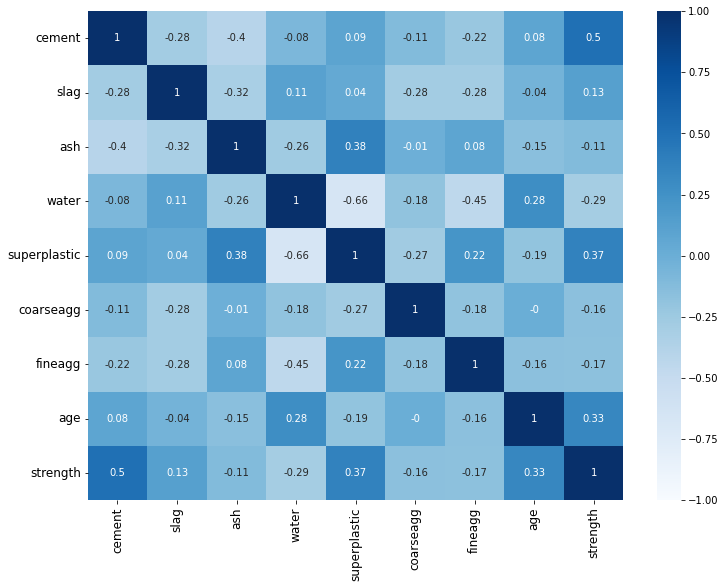

In [17]:
ax.figure.set_size_inches((12, 9))
fig

### Generating same plot using matplotlib and DataFrame stored in "res"

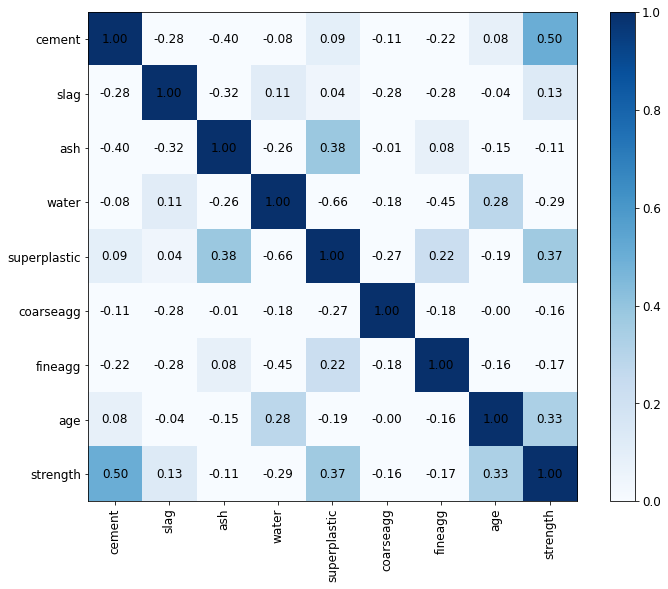

In [18]:
cfit = res["corr_mat"]

# Instantiating a figure and axes object
fig, ax = plt.subplots(figsize = (12, 9))
# Generate a plot
cax = ax.imshow(cfit.values, interpolation='nearest', cmap='Blues', vmin=0, vmax=1)
# Setting the axes labels
ax.set_xticks(ticks = range(len(cfit.columns)),
              labels = cfit.columns)
ax.set_yticks(ticks = range(len(cfit.columns)),
              labels = cfit.columns)
# Setting tick parameters
ax.tick_params(axis = "x", labelsize = 12, labelrotation = 90)
ax.tick_params(axis = "y", labelsize = 12, labelrotation = 0)
# Adding a colorbar
fig.colorbar(cax).ax.tick_params(labelsize = 12)
# Adding annotations
for (x, y), t in np.ndenumerate(cfit):
    ax.annotate("{:.2f}".format(t),
                xy = (x, y),
                va = "center",
                ha = "center").set(color = "black", size = 12)